In [14]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

data = pd.read_excel(r'C:\Users\georgia.malach\Downloads\Source code\Sample code first project\QVC_CATI_17.01.22_FINAL.xlsx')


In [15]:
cati = data[['StartTime', 'c1', 'c2', 'qsoc', 'segnew2']]

In [16]:
cati['day_of_week'] = cati['StartTime'].dt.day_name()

C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_4644/2428071133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cati['day_of_week'] = cati['StartTime'].dt.day_name()


In [17]:
cati.StartTime = cati.StartTime.apply(pd.to_datetime)
cati['Day'] = [d.date() for d in cati['StartTime']]
cati['Time'] = [d.time() for d in cati['StartTime']]

C:\Users\georgia.malach\Downloads\Source code\Sample code first project\.venv\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_4644/1366518252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cati['Day'] = [d.date() for d in cati['StartTime']]
C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_4644/1366518252.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [18]:
cati['weekend'] = 0
cati.loc[cati['day_of_week'].isin(["Saturday", "Sunday"]), 'weekend'] = 1
cati

C:\Users\GEORGI~1.MAL\AppData\Local\Temp/ipykernel_4644/727757115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cati['weekend'] = 0
C:\Users\georgia.malach\Downloads\Source code\Sample code first project\.venv\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend
0,2021-12-14 12:11:43,Female,_55to64,Refused,PreferNotToSay,Tuesday,2021-12-14,12:11:43,0
1,2021-12-14 13:56:11,Female,_55to64,C1,FullTime,Tuesday,2021-12-14,13:56:11,0
2,2021-12-14 14:00:16,InAnotherWay,PreferNotToSay,Refused,PreferNotToSay,Tuesday,2021-12-14,14:00:16,0
3,2021-12-14 14:14:36,Female,_45to54,C2,FullTime,Tuesday,2021-12-14,14:14:36,0
4,2021-12-14 14:21:16,Female,PreferNotToSay,Refused,PreferNotToSay,Tuesday,2021-12-14,14:21:16,0
...,...,...,...,...,...,...,...,...,...
1111,2022-01-12 19:03:36,Female,_45to54,Refused,PreferNotToSay,Wednesday,2022-01-12,19:03:36,0
1112,2022-01-12 19:10:50,Female,_35to44,C2,FullTime,Wednesday,2022-01-12,19:10:50,0
1113,2022-01-12 19:17:59,Female,_55to64,D,FullTime,Wednesday,2022-01-12,19:17:59,0
1114,2022-01-12 19:21:54,Male,_55to64,C2,FullTime,Wednesday,2022-01-12,19:21:54,0


In [19]:
cati = cati.dropna(how = 'any', axis = 0)
cati

,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend
0,2021-12-14 12:11:43,Female,_55to64,Refused,PreferNotToSay,Tuesday,2021-12-14,12:11:43,0
1,2021-12-14 13:56:11,Female,_55to64,C1,FullTime,Tuesday,2021-12-14,13:56:11,0
2,2021-12-14 14:00:16,InAnotherWay,PreferNotToSay,Refused,PreferNotToSay,Tuesday,2021-12-14,14:00:16,0
3,2021-12-14 14:14:36,Female,_45to54,C2,FullTime,Tuesday,2021-12-14,14:14:36,0
4,2021-12-14 14:21:16,Female,PreferNotToSay,Refused,PreferNotToSay,Tuesday,2021-12-14,14:21:16,0
...,...,...,...,...,...,...,...,...,...
1111,2022-01-12 19:03:36,Female,_45to54,Refused,PreferNotToSay,Wednesday,2022-01-12,19:03:36,0
1112,2022-01-12 19:10:50,Female,_35to44,C2,FullTime,Wednesday,2022-01-12,19:10:50,0
1113,2022-01-12 19:17:59,Female,_55to64,D,FullTime,Wednesday,2022-01-12,19:17:59,0
1114,2022-01-12 19:21:54,Male,_55to64,C2,FullTime,Wednesday,2022-01-12,19:21:54,0


In [20]:
cati.set_index('StartTime', inplace = True)

In [21]:
cati.reset_index(inplace=True)

In [22]:
from datetime import datetime, date, time

In [23]:
cati.loc[cati["StartTime"].dt.time > time(17, 0), :]

,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend
33,2021-12-14 17:03:21,Male,_35to44,C1,FullTime,Tuesday,2021-12-14,17:03:21,0
34,2021-12-14 17:03:41,Female,_65Plus,C1,RetiredPrivatePention,Tuesday,2021-12-14,17:03:41,0
35,2021-12-14 17:12:16,Female,_65Plus,C1,PartTime,Tuesday,2021-12-14,17:12:16,0
36,2021-12-14 17:18:49,Female,_65Plus,Refused,PreferNotToSay,Tuesday,2021-12-14,17:18:49,0
37,2021-12-14 17:23:23,Female,_65Plus,D,RetiredPrivatePention,Tuesday,2021-12-14,17:23:23,0
...,...,...,...,...,...,...,...,...,...
1110,2022-01-12 18:59:42,Female,_45to54,C1,FullTime,Wednesday,2022-01-12,18:59:42,0
1111,2022-01-12 19:03:36,Female,_45to54,Refused,PreferNotToSay,Wednesday,2022-01-12,19:03:36,0
1112,2022-01-12 19:10:50,Female,_35to44,C2,FullTime,Wednesday,2022-01-12,19:10:50,0
1113,2022-01-12 19:17:59,Female,_55to64,D,FullTime,Wednesday,2022-01-12,19:17:59,0


In [24]:
cati.loc[cati["weekend"] == 1, "conbus"] = "con"

cati.loc[(cati["weekend"] == 0) & (cati["StartTime"].dt.time > time(17, 0)), "conbus"] = "con"
cati.loc[pd.isna(cati["conbus"]), "conbus"] = "bus"
cati

,StartTime,c1,c2,qsoc,segnew2,day_of_week,Day,Time,weekend,conbus
0,2021-12-14 12:11:43,Female,_55to64,Refused,PreferNotToSay,Tuesday,2021-12-14,12:11:43,0,bus
1,2021-12-14 13:56:11,Female,_55to64,C1,FullTime,Tuesday,2021-12-14,13:56:11,0,bus
2,2021-12-14 14:00:16,InAnotherWay,PreferNotToSay,Refused,PreferNotToSay,Tuesday,2021-12-14,14:00:16,0,bus
3,2021-12-14 14:14:36,Female,_45to54,C2,FullTime,Tuesday,2021-12-14,14:14:36,0,bus
4,2021-12-14 14:21:16,Female,PreferNotToSay,Refused,PreferNotToSay,Tuesday,2021-12-14,14:21:16,0,bus
...,...,...,...,...,...,...,...,...,...,...
1111,2022-01-12 19:03:36,Female,_45to54,Refused,PreferNotToSay,Wednesday,2022-01-12,19:03:36,0,con
1112,2022-01-12 19:10:50,Female,_35to44,C2,FullTime,Wednesday,2022-01-12,19:10:50,0,con
1113,2022-01-12 19:17:59,Female,_55to64,D,FullTime,Wednesday,2022-01-12,19:17:59,0,con
1114,2022-01-12 19:21:54,Male,_55to64,C2,FullTime,Wednesday,2022-01-12,19:21:54,0,con


In [25]:
contingency = pd.crosstab(cati['segnew2'], cati['conbus'])
contingency

conbus,bus,con
segnew2,,
FullTime,267,226
NotWorking,9,8
PartTime,53,32
PreferNotToSay,81,80
RetiredPrivatePention,107,92
RetiredStateBenefit,85,54
Student,2,0
UnemployedNotAbleToWork,11,3
UnemployedSeekingWork,5,1


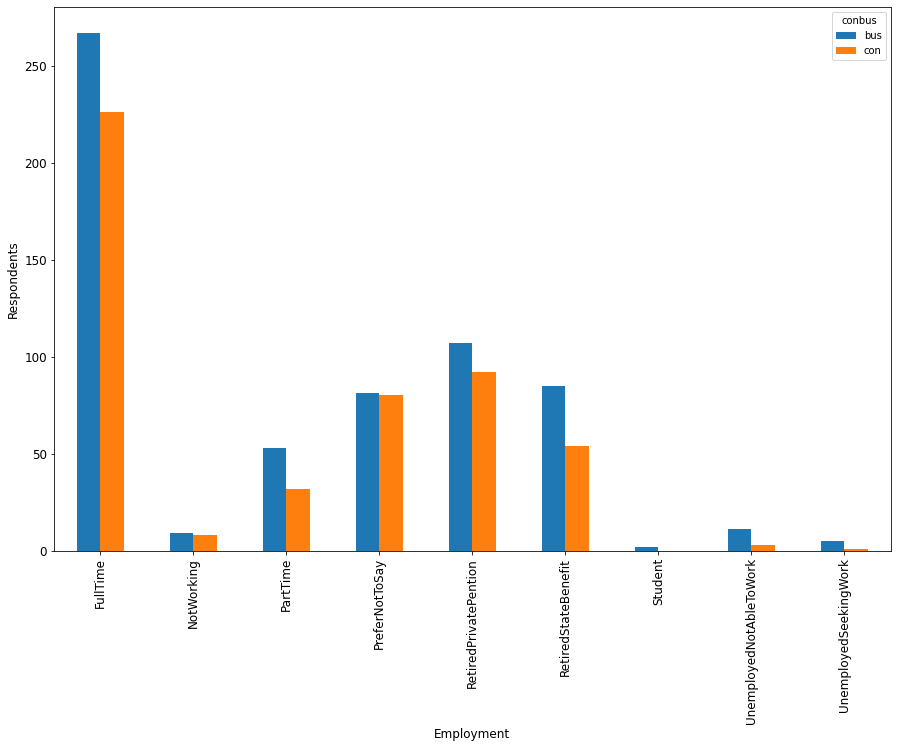

In [26]:
ax = contingency[['bus', 'con']].plot(kind='bar', figsize=(15,10), legend = True, fontsize = 12)
ax.set_xlabel("Employment", fontsize=12)
ax.set_ylabel("Respondents", fontsize=12)
plt.show()

In [27]:
contingency_pct = pd.crosstab(cati['segnew2'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
segnew2,,
FullTime,0.430645,0.455645
NotWorking,0.014516,0.016129
PartTime,0.085484,0.064516
PreferNotToSay,0.130645,0.161290
RetiredPrivatePention,0.172581,0.185484
RetiredStateBenefit,0.137097,0.108871
Student,0.003226,0.000000
UnemployedNotAbleToWork,0.017742,0.006048
UnemployedSeekingWork,0.008065,0.002016


<AxesSubplot:xlabel='conbus', ylabel='segnew2'>

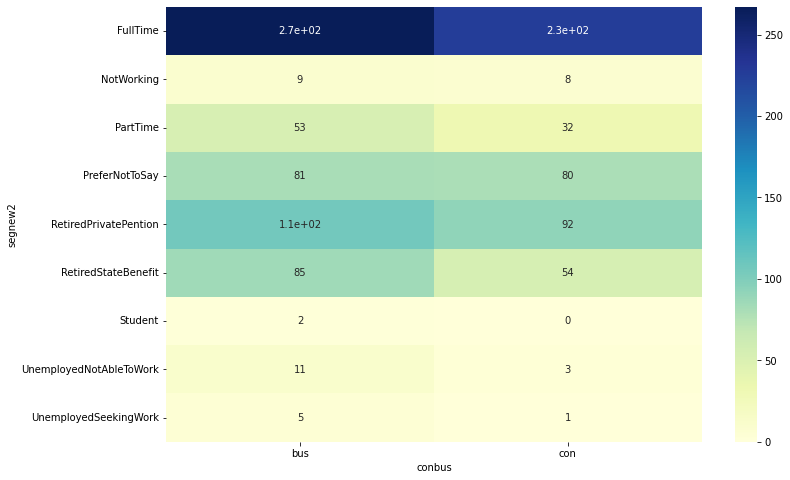

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot = True, cmap = "YlGnBu")

In [29]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9999999992468003

In [30]:
c

0.023244469355434335

In [31]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9999999992468003
Independent (H0 holds true)


In [32]:
contingency = pd.crosstab(cati['c2'], cati['conbus'])
contingency

conbus,bus,con
c2,,
PreferNotToSay,27,22
_16to24,3,2
_25to34,13,9
_35to44,35,32
_45to54,108,100
_55to64,201,144
_65Plus,233,187


In [33]:
contingency_pct = pd.crosstab(cati['c2'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
c2,,
PreferNotToSay,0.043548,0.044355
_16to24,0.004839,0.004032
_25to34,0.020968,0.018145
_35to44,0.056452,0.064516
_45to54,0.174194,0.201613
_55to64,0.324194,0.290323
_65Plus,0.375806,0.377016


<AxesSubplot:xlabel='conbus', ylabel='c2'>

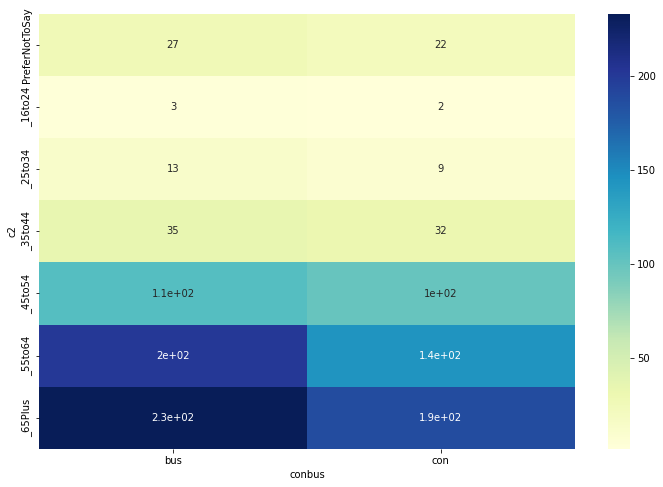

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot = True, cmap = "YlGnBu")

In [35]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9999999978525992

In [36]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9999999978525992
Independent (H0 holds true)


In [37]:
contingency = pd.crosstab(cati['c1'], cati['conbus'])
contingency


conbus,bus,con
c1,,
Female,564,445
InAnotherWay,2,0
Male,47,41
PreferNotToSay,7,10


In [38]:
contingency_pct = pd.crosstab(cati['c1'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
c1,,
Female,0.909677,0.897177
InAnotherWay,0.003226,0.000000
Male,0.075806,0.082661
PreferNotToSay,0.011290,0.020161


In [39]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9998731830323399

In [40]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9998731830323399
Independent (H0 holds true)


In [41]:
contingency = pd.crosstab(cati['qsoc'], cati['conbus'])
contingency

conbus,bus,con
qsoc,,
A,5,10
B,37,30
C1,166,154
C2,75,71
D,72,60
E,106,65
Refused,159,106


In [42]:
contingency_pct = pd.crosstab(cati['c1'], cati['conbus'], normalize = 'columns')
contingency_pct

conbus,bus,con
c1,,
Female,0.909677,0.897177
InAnotherWay,0.003226,0.000000
Male,0.075806,0.082661
PreferNotToSay,0.011290,0.020161


In [43]:
c, p, dof, expected = chi2_contingency(contingency_pct)
p

0.9998731830323399

In [44]:
c

0.00611087024986726

In [45]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print ('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.9998731830323399
Independent (H0 holds true)


In [46]:
def conbus(row):
    if row['weekend'] == 1:
        return "con"
    elif row['weekend'] == 0 and cati.between_time('17:30:00', '07:00:00'):
        return "con"
    else:
        return "bus"

cati['conbus'] = cati.apply(conbus, axis=1)

TypeError: Index must be DatetimeIndex

In [47]:
cati = pd.get_dummies(cati, columns=['c1', 'c2', 'qsoc', 'segnew2'], drop_first = True)
cati.head()

,StartTime,day_of_week,Day,Time,weekend,conbus,c1_InAnotherWay,c1_Male,c1_PreferNotToSay,c2__16to24,...,qsoc_E,qsoc_Refused,segnew2_NotWorking,segnew2_PartTime,segnew2_PreferNotToSay,segnew2_RetiredPrivatePention,segnew2_RetiredStateBenefit,segnew2_Student,segnew2_UnemployedNotAbleToWork,segnew2_UnemployedSeekingWork
0,2021-12-14 12:11:43,Tuesday,2021-12-14,12:11:43,0,bus,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2021-12-14 13:56:11,Tuesday,2021-12-14,13:56:11,0,bus,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-12-14 14:00:16,Tuesday,2021-12-14,14:00:16,0,bus,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2021-12-14 14:14:36,Tuesday,2021-12-14,14:14:36,0,bus,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-12-14 14:21:16,Tuesday,2021-12-14,14:21:16,0,bus,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [48]:
cati = pd.get_dummies(cati, columns = ['conbus'], drop_first = True)